<a href="https://colab.research.google.com/github/nafiul-araf/Lab-work/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Load The Data***

In [196]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = (15, 7)

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [197]:
df=pd.read_csv("/content/gdrive/MyDrive/CSE-464(Project)/Copy of Depression and Happiness Factor Analysis.csv")

In [198]:
#df.head(1)

In [199]:
df.columns

Index(['Timestamp', 'Which year are you in?', 'How are you feeling right now?',
       'On a scale of 1-100, how would you express this feeling?', 'Gender',
       'Age', 'Your location ?', 'Relationship status',
       'Are you happy with your financial state?',
       'How much have you succeeded to cope up with the environment of your educational institution?',
       'Understanding with your family members?',
       'Are you feeling pressure in your study or work right now?',
       'Are you satisfied with your academic result?',
       'Are you happy with your living place?',
       'Who supports you when you are not succeeding in your academic life?',
       'Have you used any social media within the last 6 hours?',
       'Are you satisfied with your meal today?',
       'Are you feeling sick/health issues today?',
       'Have you done any recreational activity (sports, gaming, hobby etc.) today?',
       'How long did you sleep last night?(in hours)', 'Unnamed: 20'],
      dty

### ***Encoding (Part-1)***

In [200]:
from sklearn.preprocessing import LabelEncoder

In [201]:
le=LabelEncoder()

In [202]:
df['How are you feeling right now?']=le.fit_transform(df['How are you feeling right now?'])

In [203]:
#df.head(2)

### ***Normalizing (Part-1)***

In [204]:
from scipy.cluster.vq import whiten

In [205]:
df['How long did you sleep last night?(in hours)']=whiten(df['How long did you sleep last night?(in hours)'])

In [206]:
#df.head(1)

In [207]:
df['How are you feeling right now?']=whiten(df['How are you feeling right now?'])

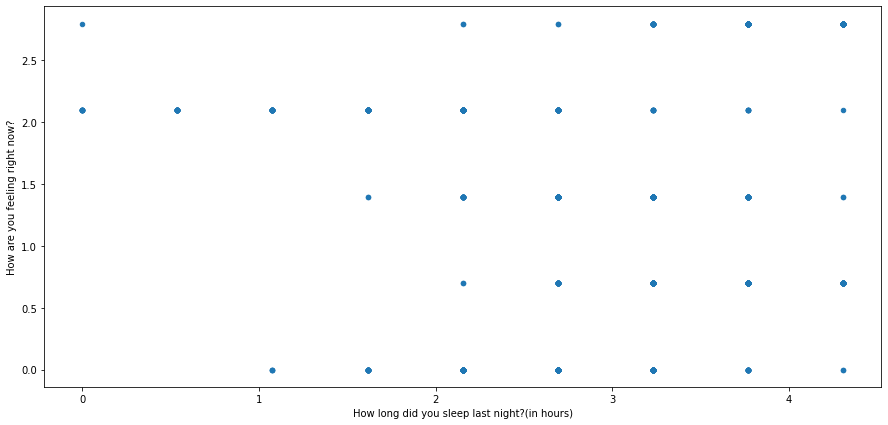

In [208]:
df.plot(x='How long did you sleep last night?(in hours)',y='How are you feeling right now?',kind='scatter')

plt.show()

In [209]:
print(df[['How long did you sleep last night?(in hours)','How are you feeling right now?']].describe())

       How long did you sleep last night?(in hours)  How are you feeling right now?
count                                    920.000000                      920.000000
mean                                       3.076473                        1.447678
std                                        1.000544                        1.000544
min                                        0.000000                        0.000000
25%                                        2.691987                        0.698408
50%                                        3.230385                        1.396816
75%                                        3.768782                        2.095224
max                                        4.307180                        2.793632


### ***Clustering Part 1 (Test)***

In [210]:
from scipy.cluster.vq import kmeans, vq

In [211]:
cluster_centers, distortion = kmeans(df[['How long did you sleep last night?(in hours)', 'How are you feeling right now?']], 2)

In [212]:
df['cluster_labels'], distortion_list = vq(df[['How long did you sleep last night?(in hours)', 'How are you feeling right now?']],
                                           cluster_centers)

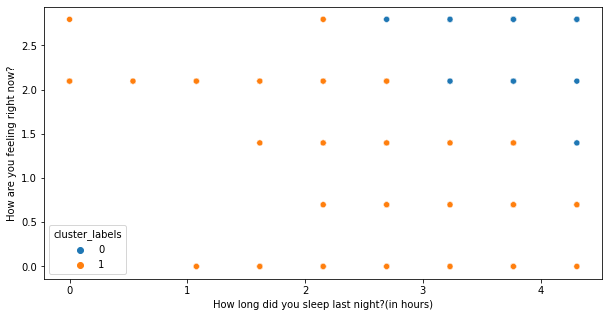

In [213]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='How long did you sleep last night?(in hours)', y='How are you feeling right now?', 
                hue='cluster_labels', data = df)

plt.show()

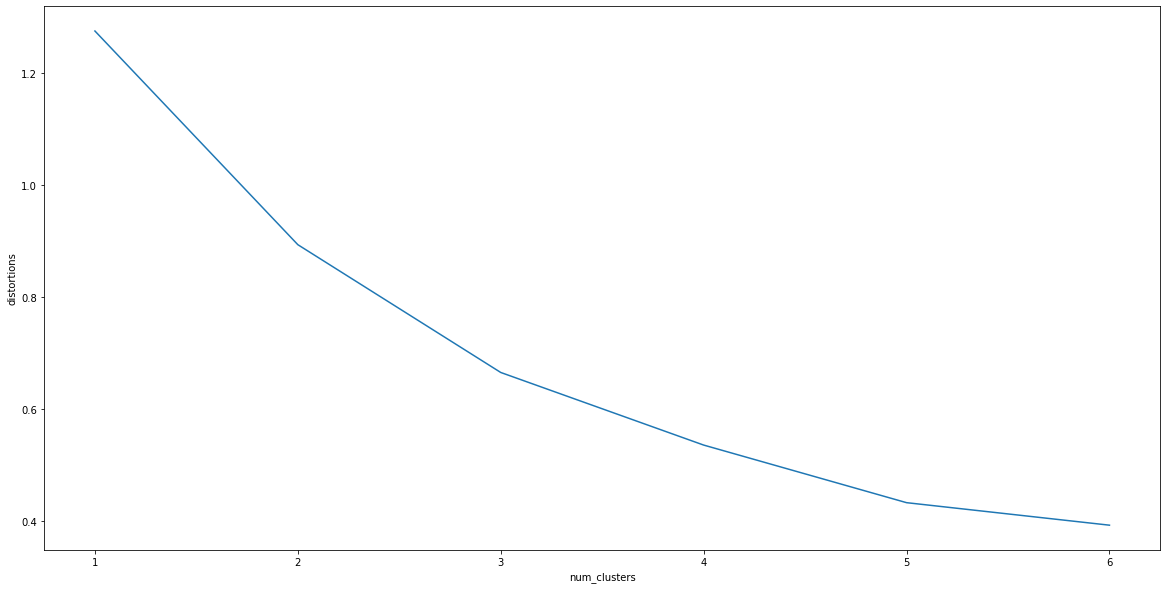

In [214]:
distortions=[]
num_clusters = range(1, 7)

for i in num_clusters:
    cluster_centers,distortion=kmeans(df[['How long did you sleep last night?(in hours)','How are you feeling right now?']],i)
    distortions.append(distortion)
    
elbow_plot=pd.DataFrame({
    'num_clusters':num_clusters,
    'distortions':distortions
})

plt.figure(figsize=(20, 10))

sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

Impact of Seeds

In [215]:
from numpy import random

In [216]:
random.seed(0)

### ***Clustering Part-2 (Test)***

In [217]:
cluster_centers, distortion = kmeans(df[['How long did you sleep last night?(in hours)', 'How are you feeling right now?']], 5)

In [218]:
df['cluster_labels'], distortion_list = vq(df[['How long did you sleep last night?(in hours)', 'How are you feeling right now?']],
                                           cluster_centers)

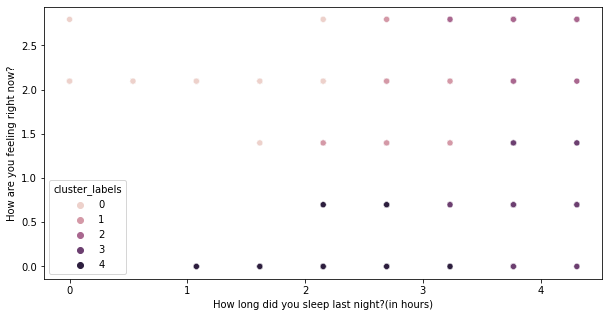

In [219]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='How long did you sleep last night?(in hours)', y='How are you feeling right now?', 
                hue='cluster_labels', data = df)
plt.show()

In [220]:
random.seed([1,2,1000])

### ***Clustering Part-3 (Test)***

In [221]:
cluster_centers, distortion = kmeans(df[['How long did you sleep last night?(in hours)', 'How are you feeling right now?']], 4)

In [222]:
df['cluster_labels'], distortion_list = vq(df[['How long did you sleep last night?(in hours)', 'How are you feeling right now?']],
                                           cluster_centers)

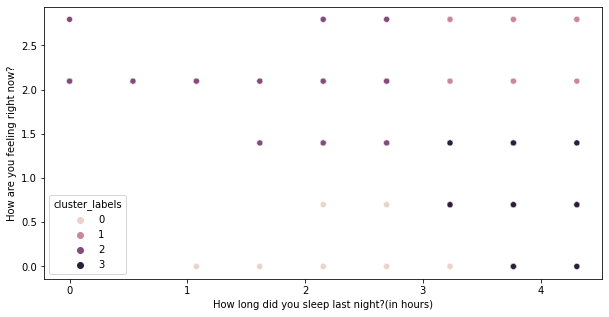

In [223]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='How long did you sleep last night?(in hours)', y='How are you feeling right now?', 
                hue='cluster_labels', data = df)
plt.show()

In [224]:
random.seed([1000, 2000])

### ***Clustering Part-4 (Test)***

In [225]:
cluster_centers,_ = kmeans(df[['How long did you sleep last night?(in hours)', 'How are you feeling right now?']], 5)

In [226]:
df['cluster_labels'],_ = vq(df[['How long did you sleep last night?(in hours)', 'How are you feeling right now?']], cluster_centers)

In [227]:
print(df[['How long did you sleep last night?(in hours)','How are you feeling right now?','cluster_labels']].groupby('cluster_labels').mean())

                How long did you sleep last night?(in hours)  How are you feeling right now?
cluster_labels                                                                              
0                                                   2.498164                        0.099773
1                                                   4.090837                        2.771308
2                                                   3.704570                        0.743260
3                                                   2.809030                        1.548644
4                                                   1.393755                        2.100856


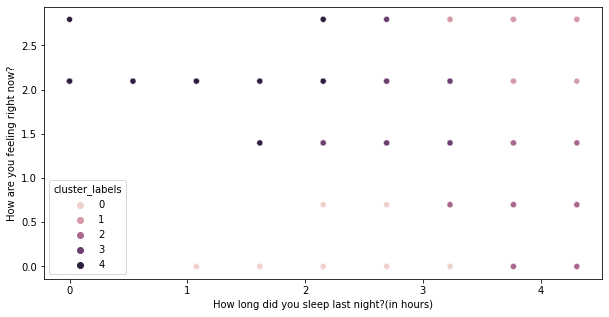

In [228]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='How long did you sleep last night?(in hours)', y='How are you feeling right now?', hue='cluster_labels', data=df)
plt.show()

In [229]:
#df.head(1)

### ***Encoding (Part-2)***

In [230]:
df.drop(['Timestamp','Unnamed: 20','cluster_labels'],axis=1,inplace=True)
df=df.apply(pd.to_numeric,errors='coerce')
df=df.apply(le.fit_transform)
#df.head(3)

### ***Normalizing(Part-2)***

In [231]:
for col in df.columns:
  df[col]=whiten(df[col])
#df.head(3)

In [232]:
features=[
    'Which year are you in?',
    'Are you feeling pressure in your study or work right now?',
    'Are you happy with your living place?',
    'Have you used any social media within the last 6 hours?',
    'Are you satisfied with your meal today?',
    'Are you feeling sick/health issues today?',
    'Have you done any recreational activity (sports, gaming, hobby etc.) today?',
    'Your location ?',
    'Are you satisfied with your academic result?',
    'Age',
    'How long did you sleep last night?(in hours)',
    'How are you feeling right now?',
    'How much have you succeeded to cope up with the environment of your educational institution?'
]

### ***Clustering Part-1 (Main)***

**By taking the clusters among all the features**

To find the possible numbers of cluster (probability)

**1. Elbow Plot**

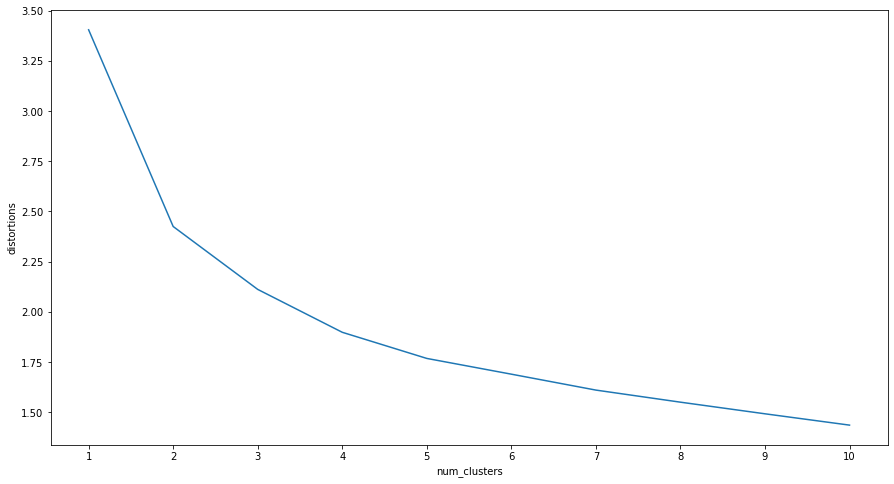

In [233]:
distortions=[]
num_clusters = range(1, 11)

for i in num_clusters:
    cluster_centers,distortion=kmeans(df[features],i)
    distortions.append(distortion)
    
elbow_plot=pd.DataFrame({
    'num_clusters':num_clusters,
    'distortions':distortions
})

plt.figure(figsize=(15, 8))

sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

**2. Dendrogram**

In [234]:
from scipy.cluster.hierarchy import linkage,dendrogram

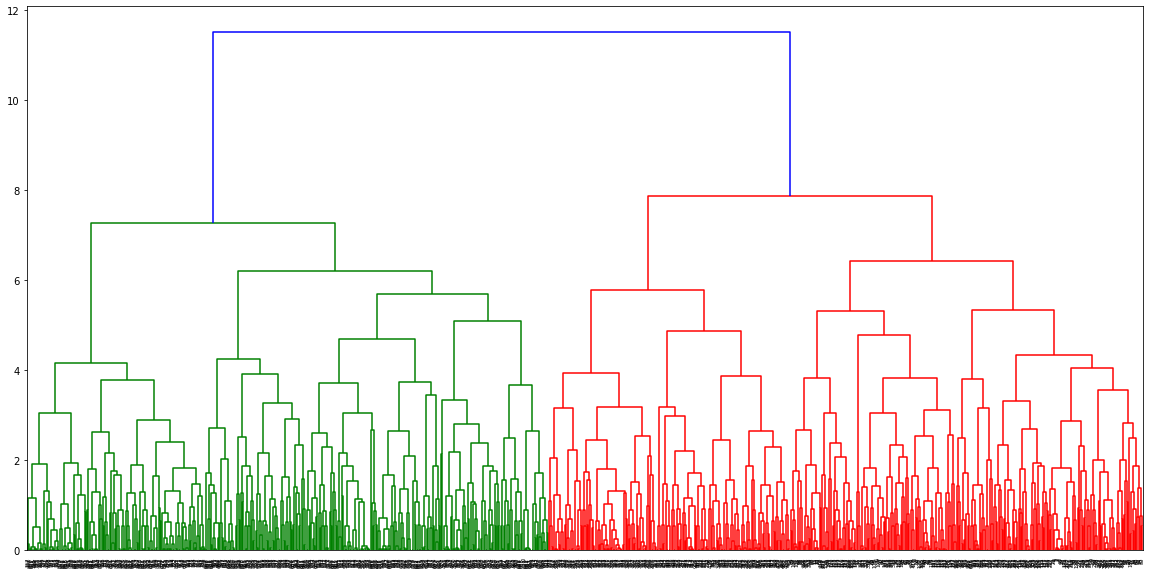

In [235]:
plt.figure(figsize=(20, 10))

Z=linkage(df[features],method='complete',metric='euclidean')
dn=dendrogram(Z)
plt.show()

In [236]:
cluster_centers,_ = kmeans(df[features], 9)

df['cluster_labels'], _ = vq(df[features], cluster_centers)
df.groupby('cluster_labels')[features].mean()

,Which year are you in?,Are you feeling pressure in your study or work right now?,Are you happy with your living place?,Have you used any social media within the last 6 hours?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",Your location ?,Are you satisfied with your academic result?,Age,How long did you sleep last night?(in hours),How are you feeling right now?,How much have you succeeded to cope up with the environment of your educational institution?
cluster_labels,,,,,,,,,,,,,
0,3.119820,3.119820,3.119820,3.119820,3.119820,3.119820,3.119820,3.119820,3.119820,0.207767,2.876438,1.358015,0.244785
1,2.131353,2.131353,2.131353,2.131353,2.131353,2.131353,2.131353,2.131353,2.131353,0.532549,3.000669,1.401472,0.383142
2,2.929818,2.929818,2.929818,2.929818,2.929818,2.929818,2.929818,2.929818,2.929818,2.340823,2.911654,1.290658,2.271266
3,0.552750,0.552750,0.552750,0.552750,0.552750,0.552750,0.552750,0.552750,0.552750,1.077066,4.163607,2.770352,0.977012
4,0.676818,0.676818,0.676818,0.676818,0.676818,0.676818,0.676818,0.676818,0.676818,1.181781,2.884913,0.692588,1.216476
5,1.361216,1.361216,1.361216,1.361216,1.361216,1.361216,1.361216,1.361216,1.361216,2.356082,3.322479,1.194645,2.276167
6,0.171121,0.171121,0.171121,0.171121,0.171121,0.171121,0.171121,0.171121,0.171121,0.192333,3.153471,0.873010,0.164204
7,0.689852,0.689852,0.689852,0.689852,0.689852,0.689852,0.689852,0.689852,0.689852,1.277290,0.952549,2.108655,1.370470
8,2.083936,2.083936,2.083936,2.083936,2.083936,2.083936,2.083936,2.083936,2.083936,2.072704,3.901994,2.311226,2.156656


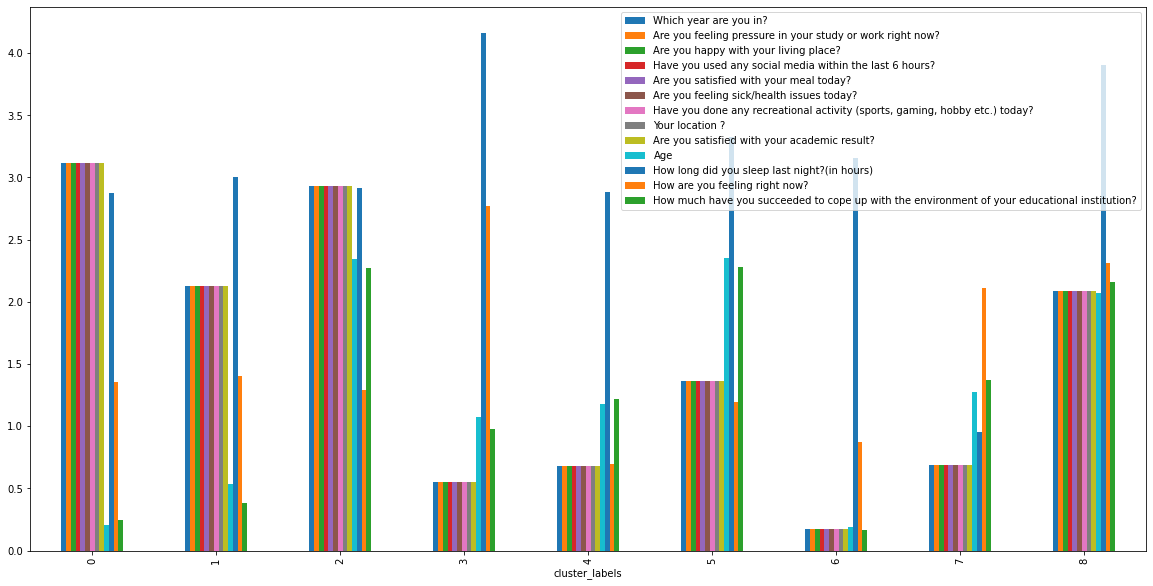

In [237]:

df.groupby('cluster_labels')[features].mean().plot(legend=True, kind='bar',figsize=(20,10))

plt.show()

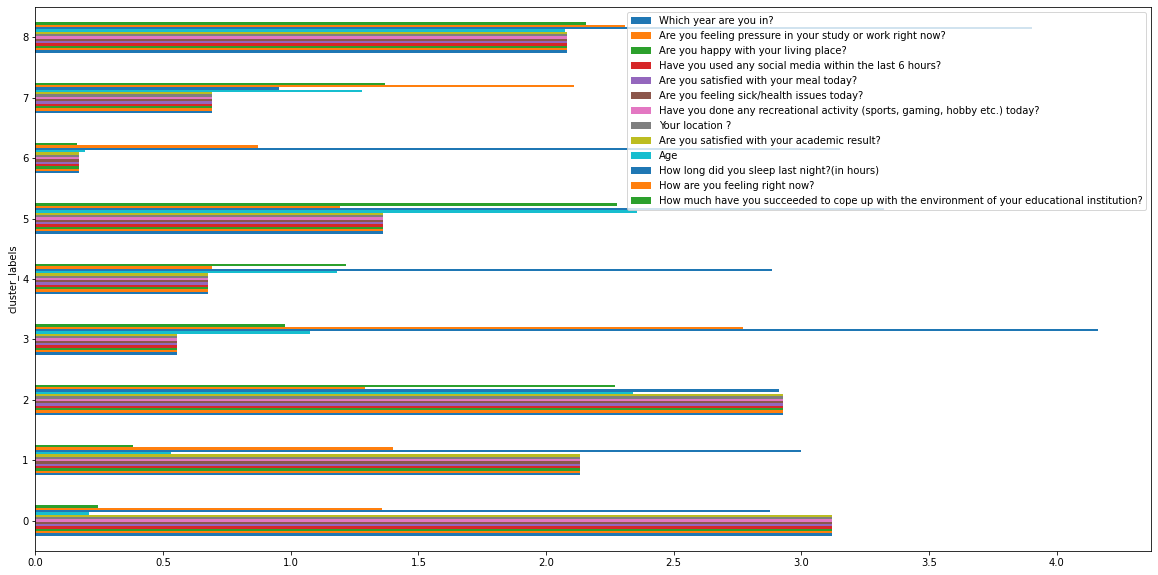

In [238]:
df.groupby('cluster_labels')[features].mean().plot(legend=True, kind='barh',figsize=(20,10))
plt.show()

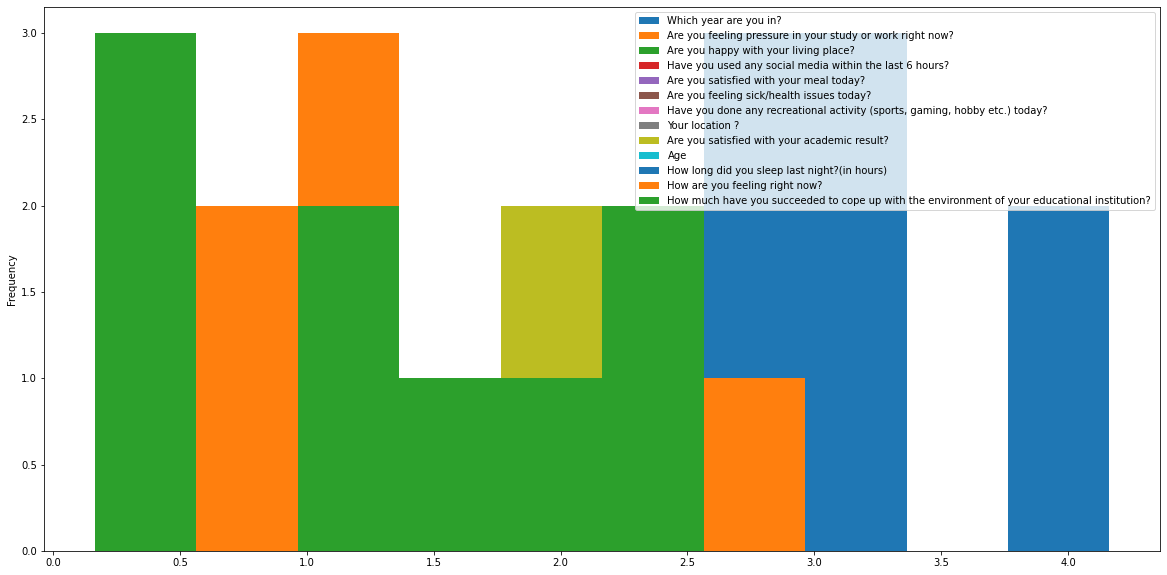

In [239]:
df.groupby('cluster_labels')[features].mean().plot(legend=True, kind='hist',figsize=(20,10))
plt.show()

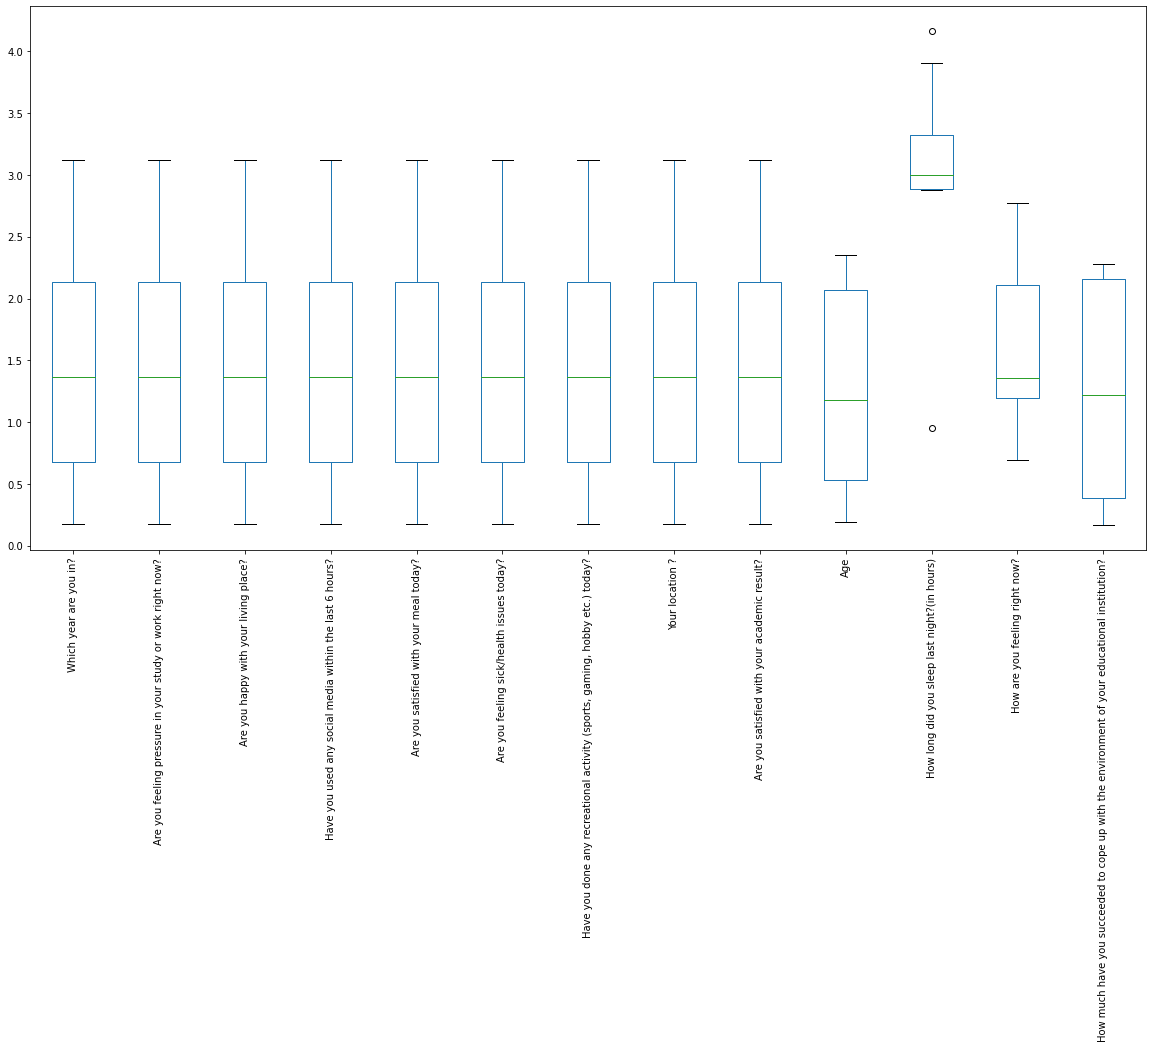

In [240]:
df.groupby('cluster_labels')[features].mean().plot(legend=True, kind='box',figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

**Runtime for Part-1**

In [241]:
%timeit kmeans(df[features], 9)

10 loops, best of 5: 68.6 ms per loop


### ***Clustering Part-2 (Main)***

**By eliminating age (It is too high value) and other features which contains one unique values**

In [242]:
#df.head(3)

In [243]:
features=[
    'Which year are you in?',
    'Are you feeling pressure in your study or work right now?',
    'Are you happy with your living place?',
    'Have you used any social media within the last 6 hours?',
    'Are you satisfied with your meal today?',
    'Are you feeling sick/health issues today?',
    'Have you done any recreational activity (sports, gaming, hobby etc.) today?',
    'Your location ?',
    'How are you feeling right now?',
    'How much have you succeeded to cope up with the environment of your educational institution?'
]

**Elbow Plot**

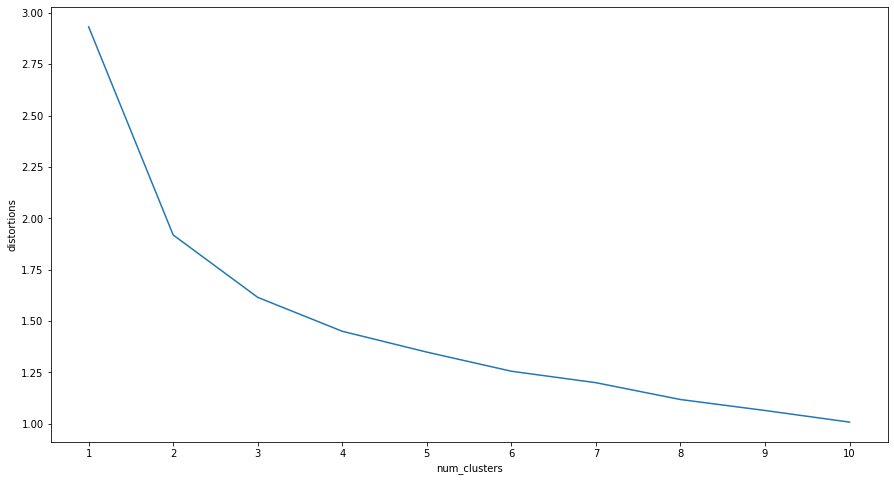

In [244]:
distortions=[]
num_clusters = range(1, 11)

for i in num_clusters:
    cluster_centers,distortion=kmeans(df[features],i)
    distortions.append(distortion)
    
elbow_plot=pd.DataFrame({
    'num_clusters':num_clusters,
    'distortions':distortions
})

plt.figure(figsize=(15, 8))

sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

**Dendrogram**

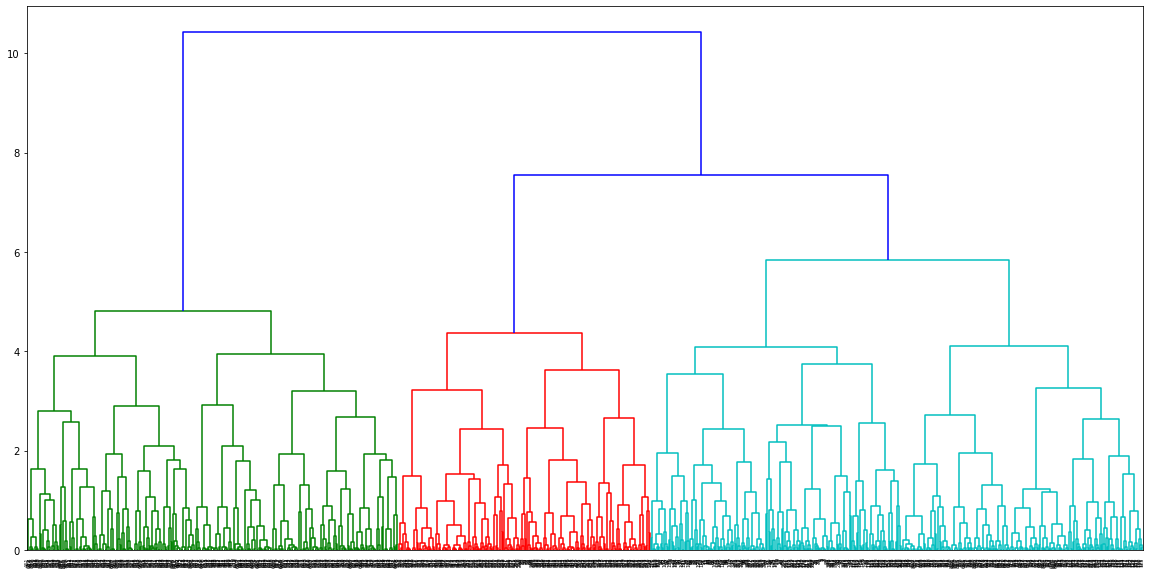

In [245]:
plt.figure(figsize=(20,10))

Z1 = linkage(df[features],method='complete',metric='euclidean')

dn = dendrogram(Z1)

plt.show()

In [246]:
cluster_centers,_ = kmeans(df[features], 8)

df['cluster_labels'], _ = vq(df[features], cluster_centers)
df.groupby('cluster_labels')[features].mean()

,Which year are you in?,Are you feeling pressure in your study or work right now?,Are you happy with your living place?,Have you used any social media within the last 6 hours?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",Your location ?,How are you feeling right now?,How much have you succeeded to cope up with the environment of your educational institution?
cluster_labels,,,,,,,,,,
0,3.145081,3.145081,3.145081,3.145081,3.145081,3.145081,3.145081,3.145081,1.338003,0.181488
1,1.565560,1.565560,1.565560,1.565560,1.565560,1.565560,1.565560,1.565560,2.451017,2.157885
2,1.469263,1.469263,1.469263,1.469263,1.469263,1.469263,1.469263,1.469263,0.635357,2.083335
3,0.564232,0.564232,0.564232,0.564232,0.564232,0.564232,0.564232,0.564232,2.224382,1.062826
4,2.854323,2.854323,2.854323,2.854323,2.854323,2.854323,2.854323,2.854323,0.668369,2.187618
5,0.455906,0.455906,0.455906,0.455906,0.455906,0.455906,0.455906,0.455906,0.497266,0.845978
6,2.200453,2.200453,2.200453,2.200453,2.200453,2.200453,2.200453,2.200453,1.559603,0.224700
7,2.794502,2.794502,2.794502,2.794502,2.794502,2.794502,2.794502,2.794502,2.525013,2.151490


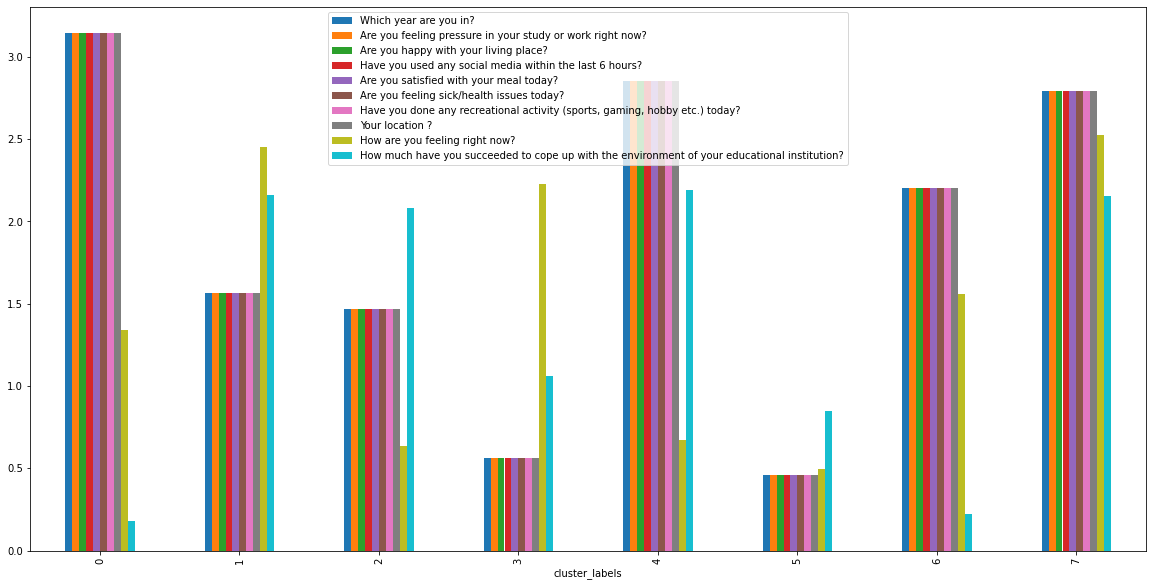

In [247]:
df.groupby('cluster_labels')[features].mean().plot(legend=True, kind='bar',figsize=(20,10))

plt.show()

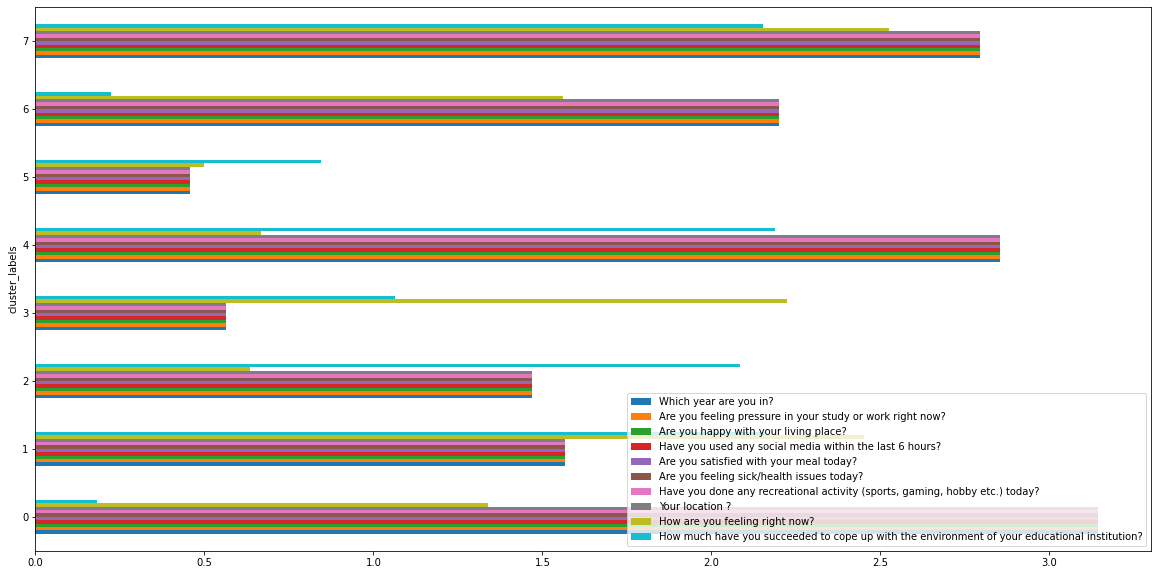

In [248]:
df.groupby('cluster_labels')[features].mean().plot(legend=True, kind='barh',figsize=(20,10))
plt.show()

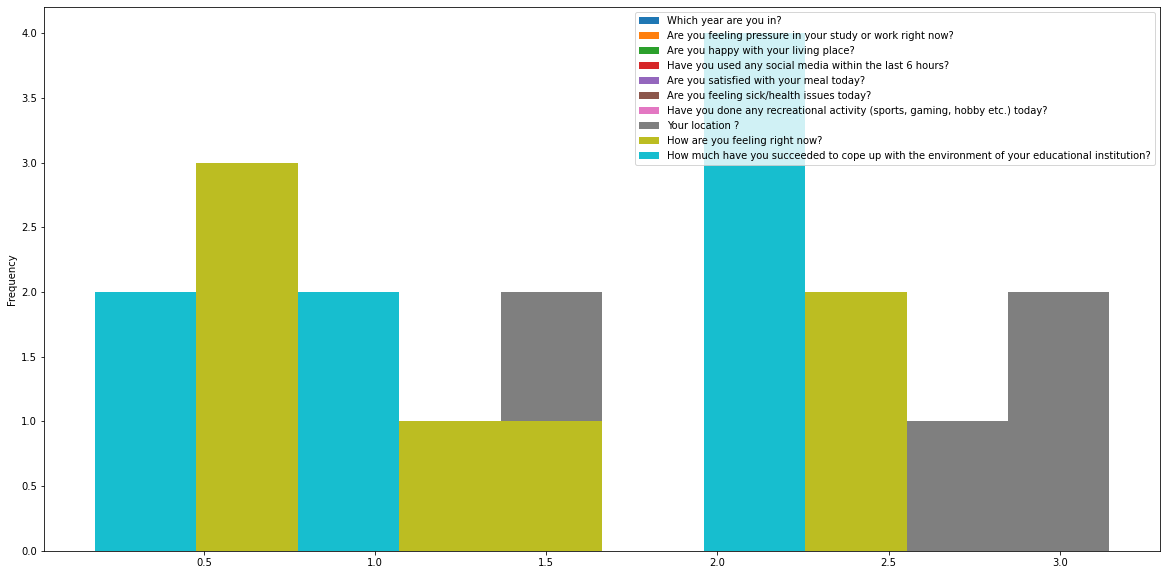

In [249]:
df.groupby('cluster_labels')[features].mean().plot(legend=True, kind='hist',figsize=(20,10))
plt.show()

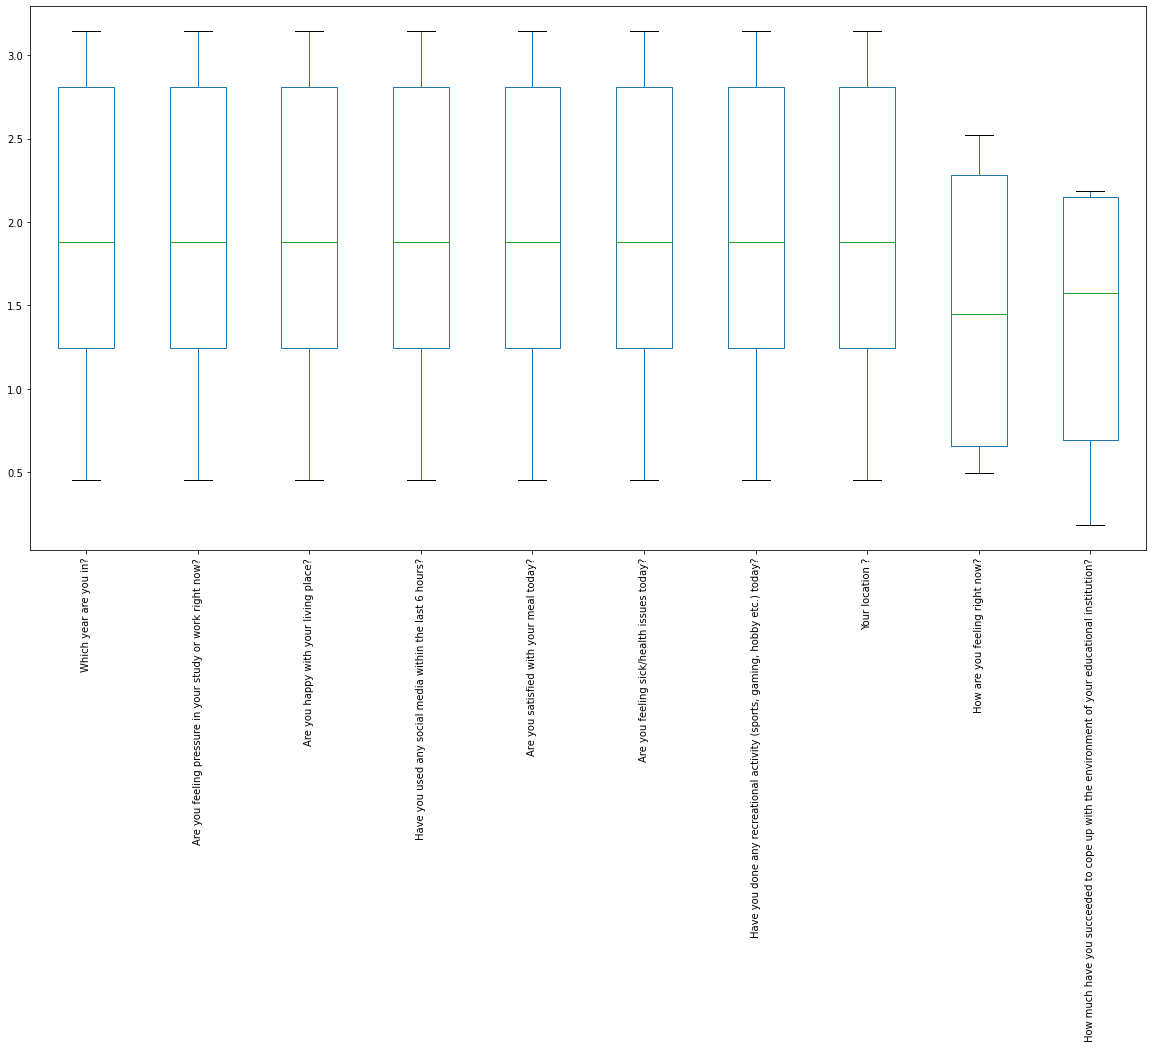

In [250]:
df.groupby('cluster_labels')[features].mean().plot(legend=True, kind='box',figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

### ***Runtime for Part-2***

In [251]:
%timeit kmeans(df[features], 8)

10 loops, best of 5: 56.2 ms per loop


### ***Summary***

In [252]:
print("\n Part-2 gives more accurate understanding compared to Part-1 \n")
print("\n All clusters are nearby........ \n")


 Part-2 gives more accurate understanding compared to Part-1 


 All clusters are nearby........ 

